In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from time import time

In [41]:
df = pd.read_csv("average_data.csv")
df = df.drop(df.columns[[0]], axis=1)

In [42]:
average_data = df.drop('attacked', axis=1)

df_scaled = StandardScaler().fit_transform(average_data)
scaled_df = pd.DataFrame(df_scaled, columns=average_data.columns)

In [16]:
pca = PCA(n_components=.95).fit(scaled_df)
transformed_df = pca.transform(scaled_df)

print('Original dimensions: ', scaled_df.shape)
print('PCA dimensions: ', transformed_df.shape)

Original dimensions:  (1567, 27)
PCA dimensions:  (1567, 8)


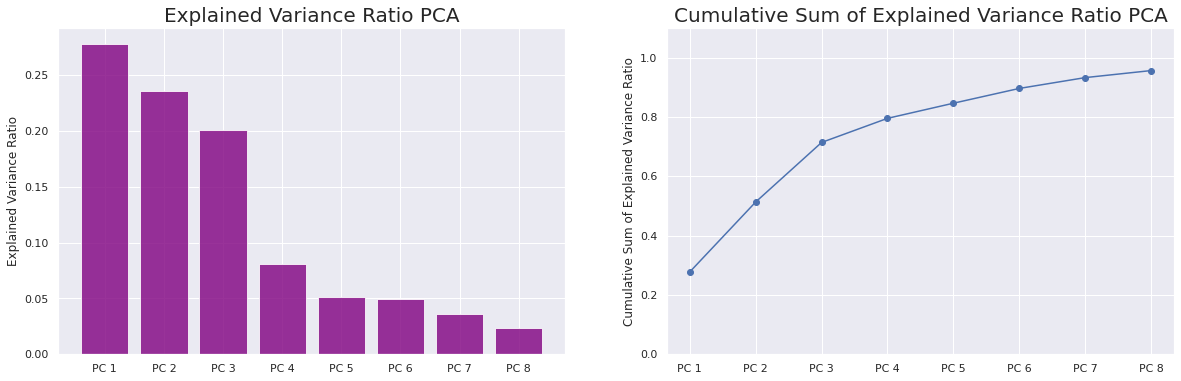

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, color='purple', alpha=0.8)
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax1.set_ylabel('Explained Variance Ratio')

# ratio[0]=0
ratio = pca.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')

ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)

ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

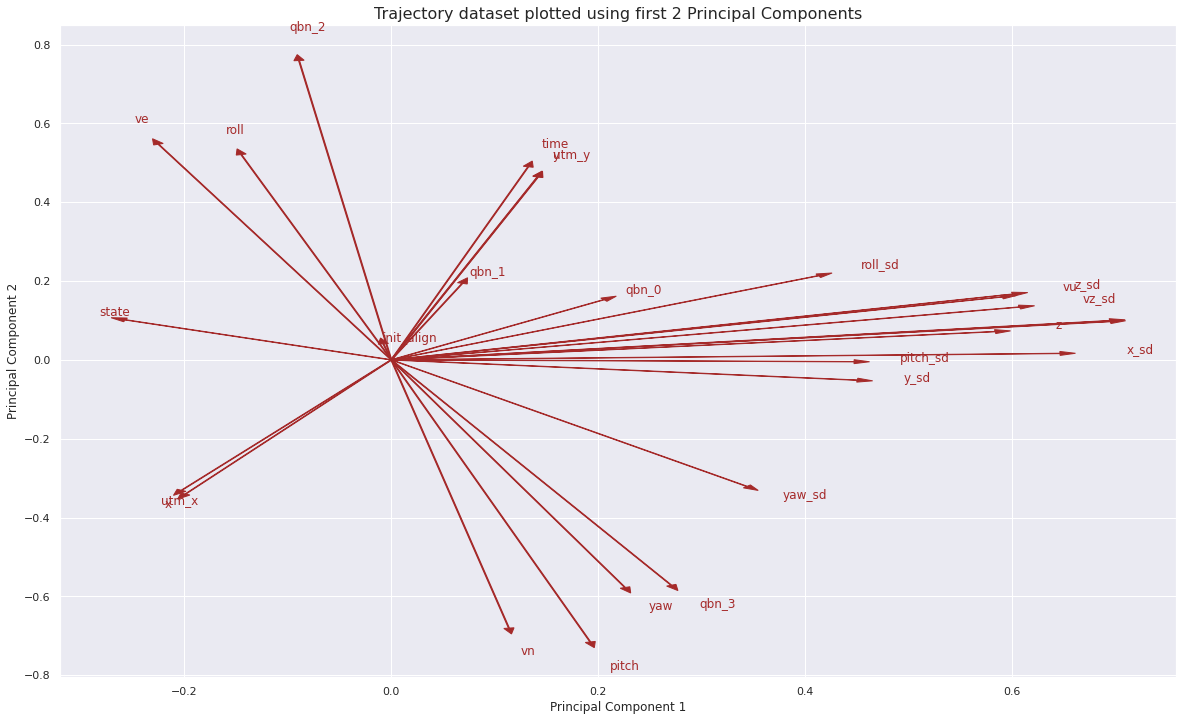

In [40]:
# to plot vectors from the center
vecs = pca.components_[0:8].T *2

fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Trajectory dataset plotted using first 2 Principal Components', fontsize=16)

# plotting arrowheads of the original axes projected on the 2D PCA space
for i, vec in enumerate(vecs):
    ax.arrow(0,0,vec[0],vec[1], color='brown', head_width=0.01)
    s = 1.1
    ax.annotate(scaled_df.columns[i], (s*vec[0], s*vec[1]), color='brown')

In [77]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

In [104]:
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

y_preds_train = LR.predict(normalized_x_train)
y_test_pred = LR.predict(normalized_x_test)

In [106]:
full_logreg_score_train = accuracy_score(y_train, y_preds_train)
full_logreg_score_test = accuracy_score(y_test, y_test_pred)

print('Training Set Score: {}'.format(full_logreg_score_train))
print('Test Set Score: {}'.format(full_logreg_score_test))

Training Set Score: 0.9976057462090981
Test Set Score: 0.9968152866242038


In [107]:
df['attacked'].value_counts() #This is an issue

1.0    1559
0.0       8
Name: attacked, dtype: int64

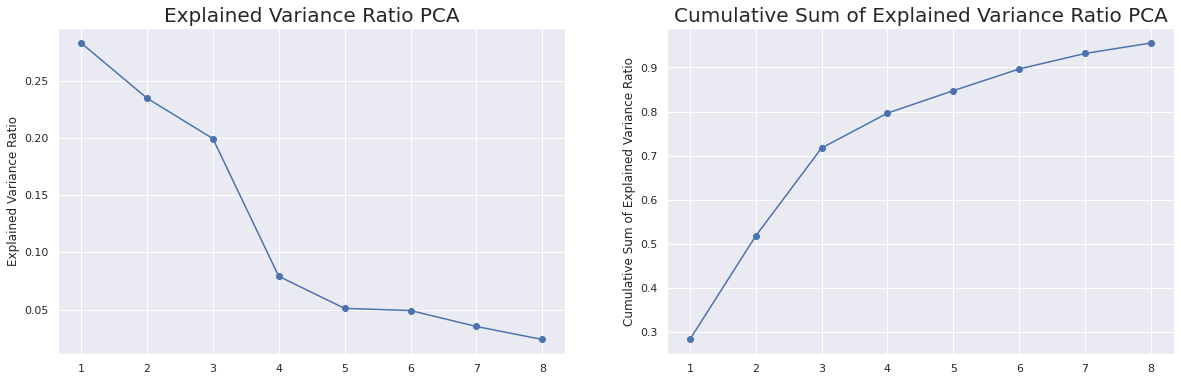

In [108]:
pca = PCA(n_components=.95).fit(normalized_x_train)

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.plot(range(1,len(ratio)+1), ratio, 'o-')
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca.explained_variance_ratio_
ax2.plot(range(1,len(ratio)+1), np.cumsum(ratio), 'o-')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [109]:
x_train_pca = pca.transform(normalized_x_train)
x_test_pca = pca.transform(normalized_x_test)

In [110]:
logreg_model_pca = LogisticRegression(C=0.01, solver='liblinear').fit(x_train_pca, y_train)

In [111]:
y_preds_train_pca = logreg_model_pca.predict(x_train_pca)
y_preds_test_pca = logreg_model_pca.predict(x_test_pca)

In [116]:
# Evaluation
print('Training Set Score (100 PCs): {}'.format(accuracy_score(y_train, y_preds_train_pca)))
print('Test Set Score (8 PCs): {}\n'.format(accuracy_score(y_test, y_preds_test_pca)))

print('Training Set Score (full dataset): {}'.format(full_logreg_score_train))
print('Test Set Score (full dataset): {}'.format(full_logreg_score_test))

Training Set Score (100 PCs): 0.9976057462090981
Test Set Score (8 PCs): 0.9968152866242038

Training Set Score (full dataset): 0.9976057462090981
Test Set Score (full dataset): 0.9968152866242038
